In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Alekhya\Downloads\d4361151-6d41-43c7-98cd-9a6cd90b5ca4 (8).csv")
print("First 5 Rows:\n", df.head())
print("Before Preprocessing:")
print(df.info())
print("\nMissing values before handling:\n", df.isnull().sum())
df = df.drop_duplicates()
num_cols = [
    'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_BRIDGES_SANCTIONED',
    'NO_OF_ROAD_WORKS_COMPLETED', 'NO_OF_BRIDGES_COMPLETED',
    'NO_OF_ROAD_WORKS_BALANCE', 'NO_OF_BRIDGES_BALANCE',
    'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS',
    'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'EXPENDITURE_OCCURED_LAKHS',
    'LENGTH_OF_ROAD_WORK_BALANCE_KM'
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df['STATE_NAME'] = df['STATE_NAME'].fillna(df['STATE_NAME'].mode()[0])
df['DISTRICT_NAME'] = df['DISTRICT_NAME'].fillna(df['DISTRICT_NAME'].mode()[0])
df['PMGSY_SCHEME'] = df['PMGSY_SCHEME'].fillna(df['PMGSY_SCHEME'].mode()[0])
print("\nAfter Preprocessing:")
print(df.info())
print("\nMissing values after handling:\n", df.isnull().sum())
df.to_csv("pmgsy_cleaned.csv", index=False)



First 5 Rows:
             STATE_NAME DISTRICT_NAME PMGSY_SCHEME  NO_OF_ROAD_WORK_SANCTIONED  \
0  Andaman And Nicobar       Nicobar      PMGSY-I                           3   
1       Andhra Pradesh    Anakapalli    PMGSY-III                          15   
2       Andhra Pradesh     Anantapur      PMGSY-I                         207   
3       Andhra Pradesh     Anantapur     PMGSY-II                           8   
4       Andhra Pradesh       Bapatla      PMGSY-I                         128   

   NO_OF_BRIDGES_SANCTIONED  NO_OF_ROAD_WORKS_COMPLETED  \
0                         0                           3   
1                         4                          13   
2                        22                         207   
3                         0                           8   
4                        13                         128   

   NO_OF_BRIDGES_COMPLETED  NO_OF_ROAD_WORKS_BALANCE  NO_OF_BRIDGES_BALANCE  \
0                        0                         0            

In [6]:
cols_to_convert = [
    'LENGTH_OF_ROAD_WORK_SANCTIONED_KM',
    'LENGTH_OF_ROAD_WORK_COMPLETED_KM',
    'LENGTH_OF_ROAD_WORK_BALANCE_KM',
    'COST_OF_WORKS_SANCTIONED_LAKHS',
    'EXPENDITURE_OCCURED_LAKHS'
]


df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=cols_to_convert, inplace=True)
df['COMPLETION_RATIO'] = df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'] / df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM']
print(sns.set(style="whitegrid"))

None


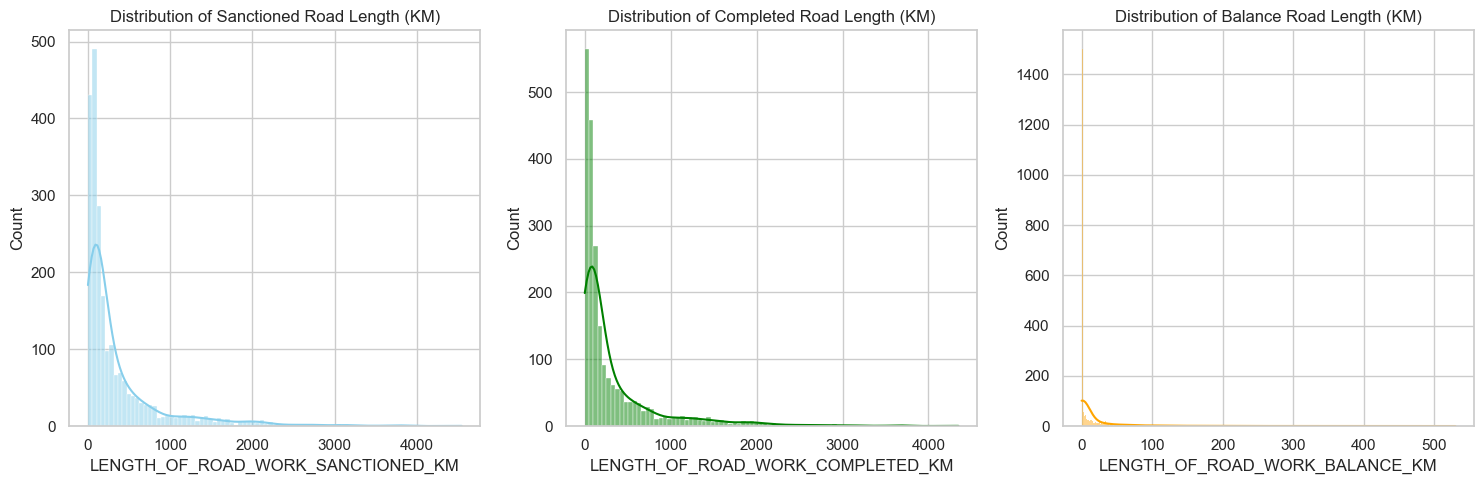

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], kde=True, color='skyblue')
plt.title('Distribution of Sanctioned Road Length (KM)')

plt.subplot(1, 3, 2)
sns.histplot(df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'], kde=True, color='green')
plt.title('Distribution of Completed Road Length (KM)')

plt.subplot(1, 3, 3)
sns.histplot(df['LENGTH_OF_ROAD_WORK_BALANCE_KM'], kde=True, color='orange')
plt.title('Distribution of Balance Road Length (KM)')

plt.tight_layout()
plt.show()

C:\Users\Alekhya\AppData\Local\Temp\ipykernel_10272\1532226238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')


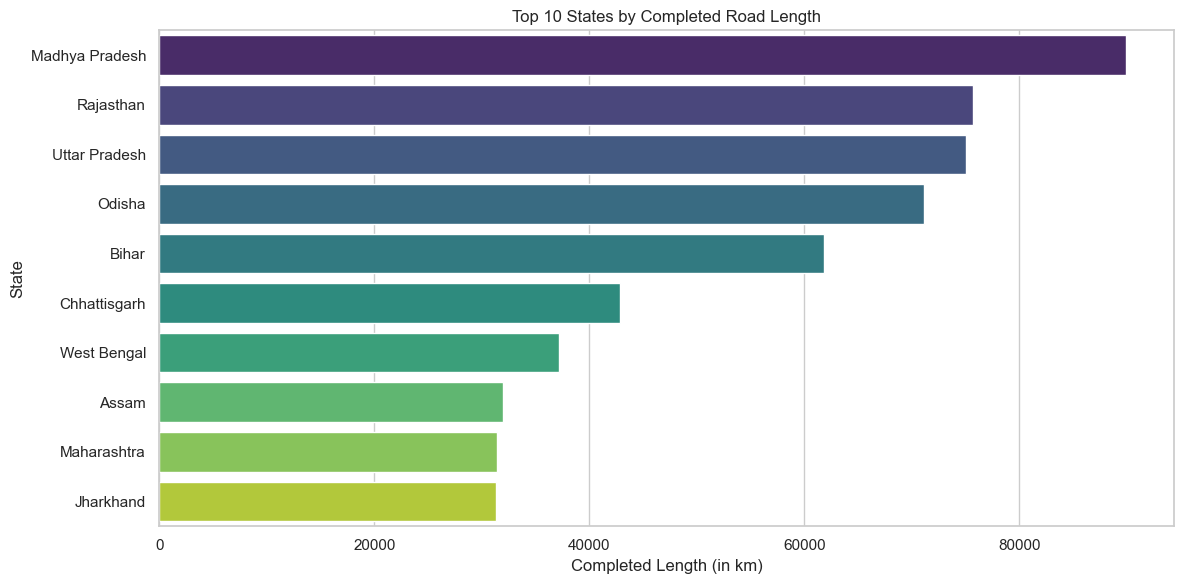

In [8]:
plt.figure(figsize=(12, 6))
top_states = df.groupby('STATE_NAME')['LENGTH_OF_ROAD_WORK_COMPLETED_KM'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title("Top 10 States by Completed Road Length")
plt.xlabel("Completed Length (in km)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


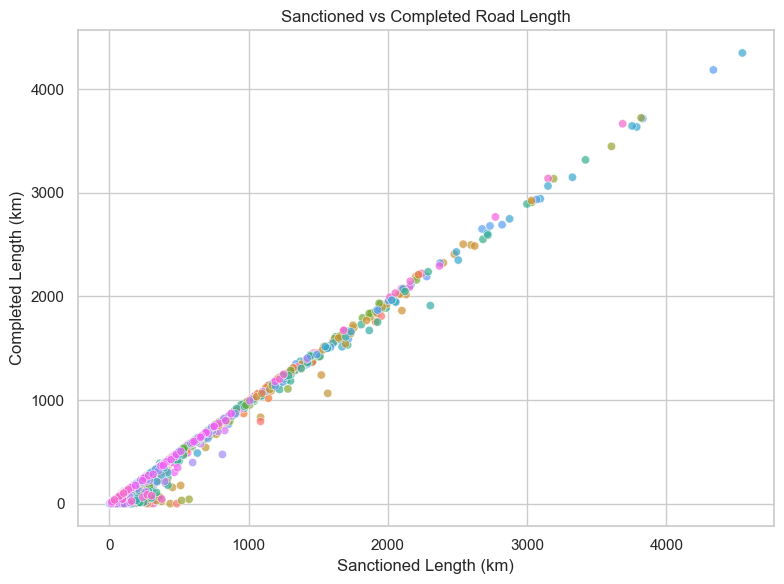

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='LENGTH_OF_ROAD_WORK_SANCTIONED_KM',
    y='LENGTH_OF_ROAD_WORK_COMPLETED_KM',
    hue='STATE_NAME',
    alpha=0.7,
    legend=False
)
plt.title("Sanctioned vs Completed Road Length")
plt.xlabel("Sanctioned Length (km)")
plt.ylabel("Completed Length (km)")
plt.grid(True)
plt.tight_layout()
plt.show()

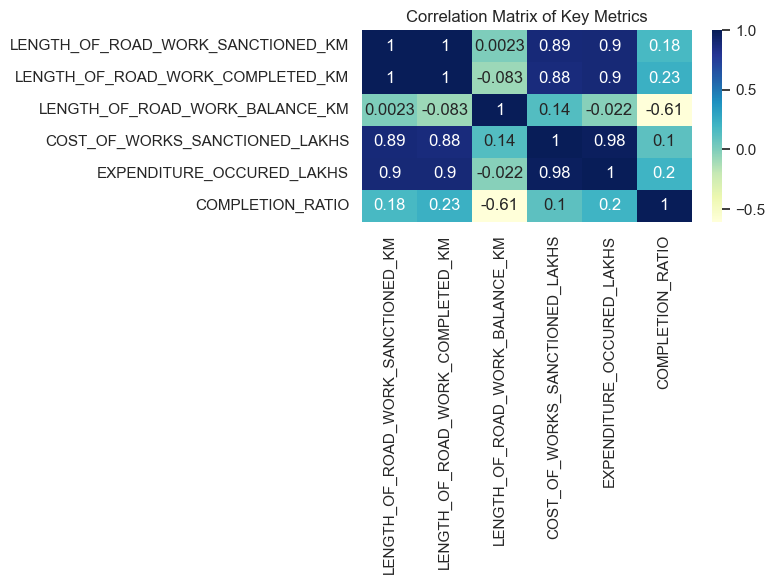

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols_to_convert + ['COMPLETION_RATIO']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix of Key Metrics")
plt.tight_layout()
plt.show()


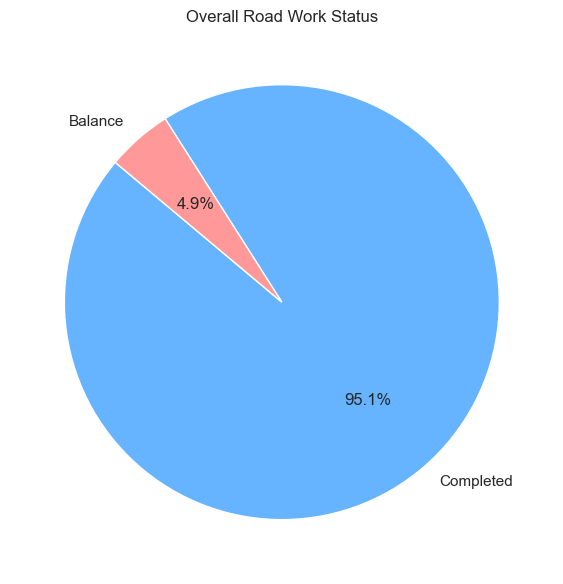

In [11]:
plt.figure(figsize=(6, 6))
completed = df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'].sum()
balance = df['LENGTH_OF_ROAD_WORK_BALANCE_KM'].sum()
plt.pie(
    [completed, balance],
    labels=['Completed', 'Balance'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=140
)
plt.title("Overall Road Work Status")
plt.tight_layout()
plt.show()

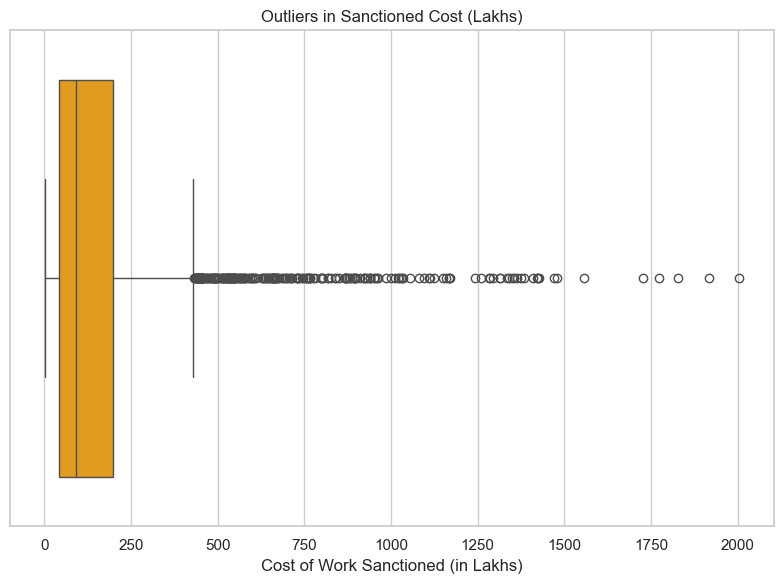

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['COST_OF_WORKS_SANCTIONED_LAKHS'], color='orange')
plt.title("Outliers in Sanctioned Cost (Lakhs)")
plt.xlabel("Cost of Work Sanctioned (in Lakhs)")
plt.tight_layout()

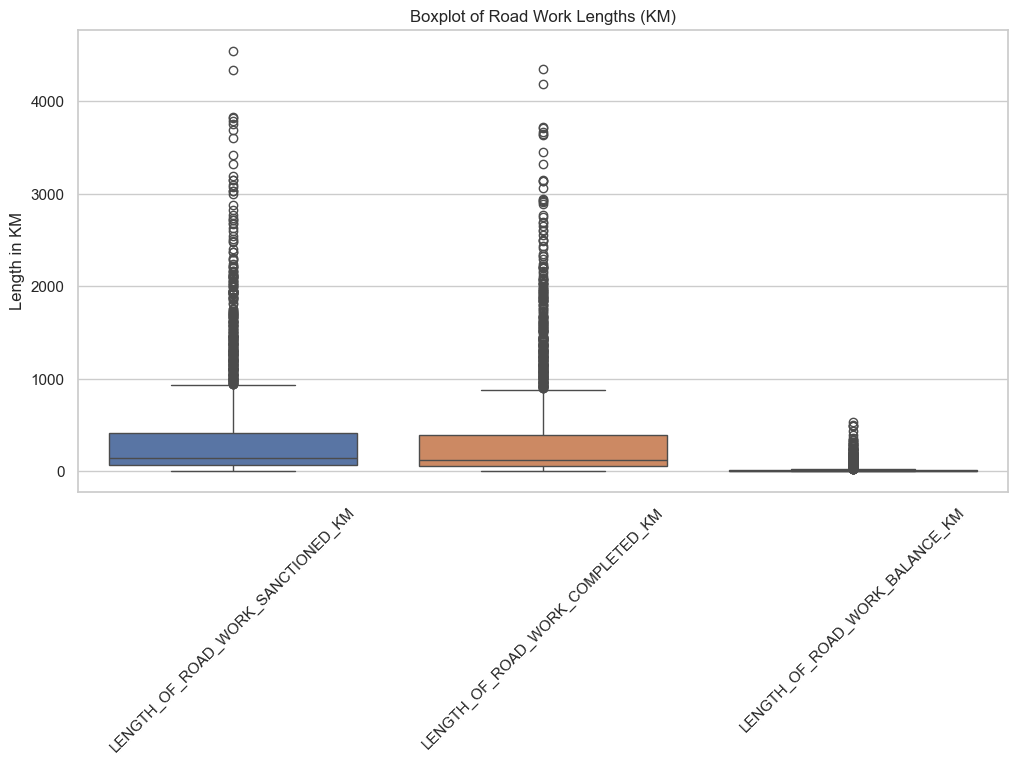

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'LENGTH_OF_ROAD_WORK_BALANCE_KM']])
plt.title('Boxplot of Road Work Lengths (KM)')
plt.ylabel("Length in KM")
plt.xticks(rotation=45)
plt.show()

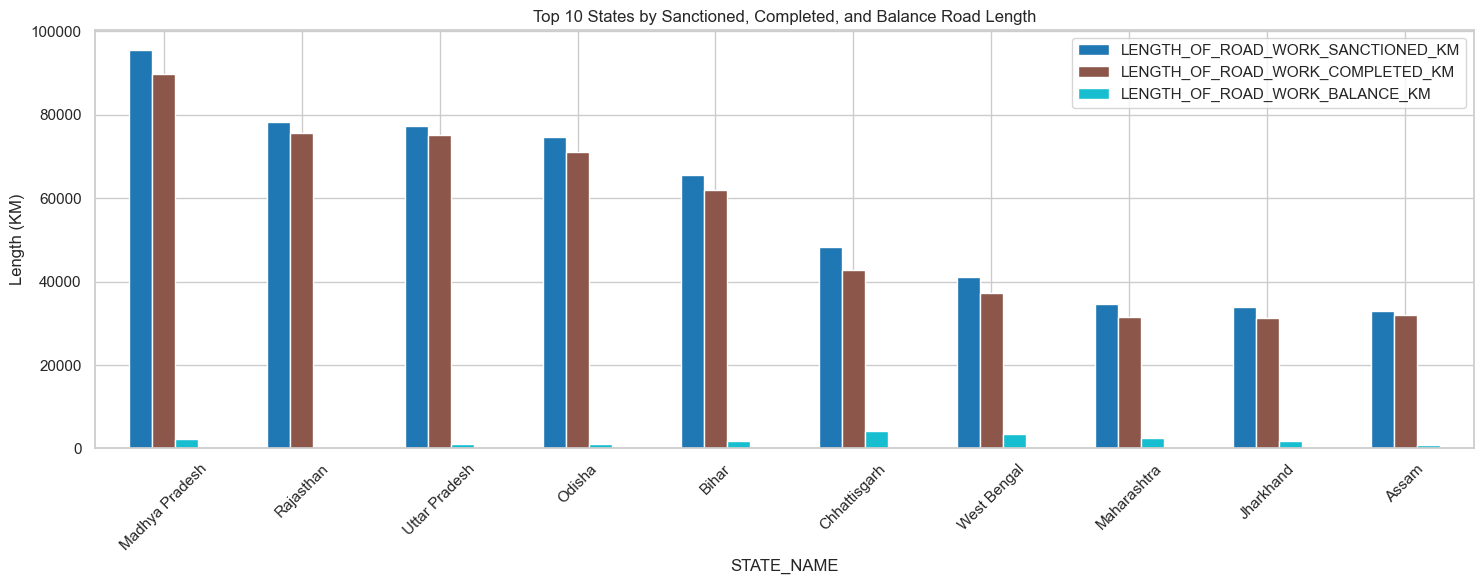

In [14]:
top_states = df.groupby('STATE_NAME')[['LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'LENGTH_OF_ROAD_WORK_BALANCE_KM']].sum().sort_values(by='LENGTH_OF_ROAD_WORK_SANCTIONED_KM', ascending=False).head(10)

top_states.plot(kind='bar', figsize=(15, 6), colormap='tab10')
plt.title('Top 10 States by Sanctioned, Completed, and Balance Road Length')
plt.ylabel('Length (KM)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

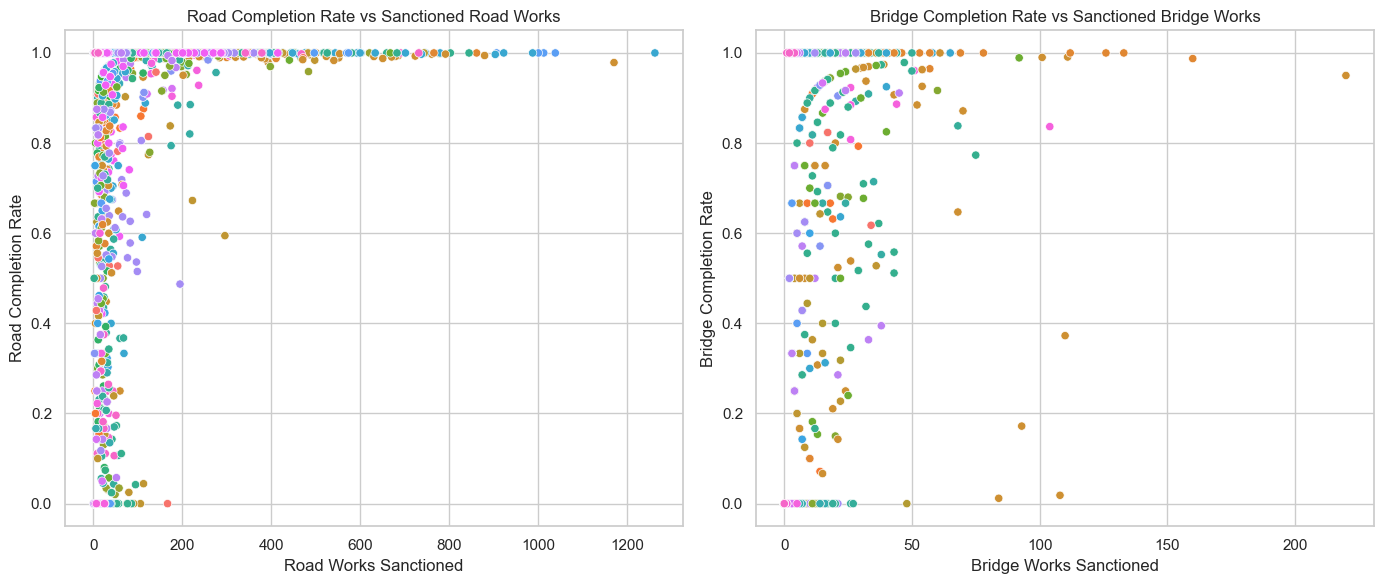

In [15]:
df['ROAD_COMPLETION_RATE'] = df['NO_OF_ROAD_WORKS_COMPLETED'] / df['NO_OF_ROAD_WORK_SANCTIONED']
df['BRIDGE_COMPLETION_RATE'] = df['NO_OF_BRIDGES_COMPLETED'] / df['NO_OF_BRIDGES_SANCTIONED']
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.fillna(0, inplace=True)
# 1. Scatter Plots: Sanctioned vs Completed
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='NO_OF_ROAD_WORK_SANCTIONED', y='ROAD_COMPLETION_RATE', hue='STATE_NAME', data=df, legend=False)
plt.title('Road Completion Rate vs Sanctioned Road Works')
plt.xlabel('Road Works Sanctioned')
plt.ylabel('Road Completion Rate')

plt.subplot(1, 2, 2)
sns.scatterplot(x='NO_OF_BRIDGES_SANCTIONED', y='BRIDGE_COMPLETION_RATE', hue='STATE_NAME', data=df, legend=False)
plt.title('Bridge Completion Rate vs Sanctioned Bridge Works')
plt.xlabel('Bridge Works Sanctioned')
plt.ylabel('Bridge Completion Rate')

plt.tight_layout()
plt.show()

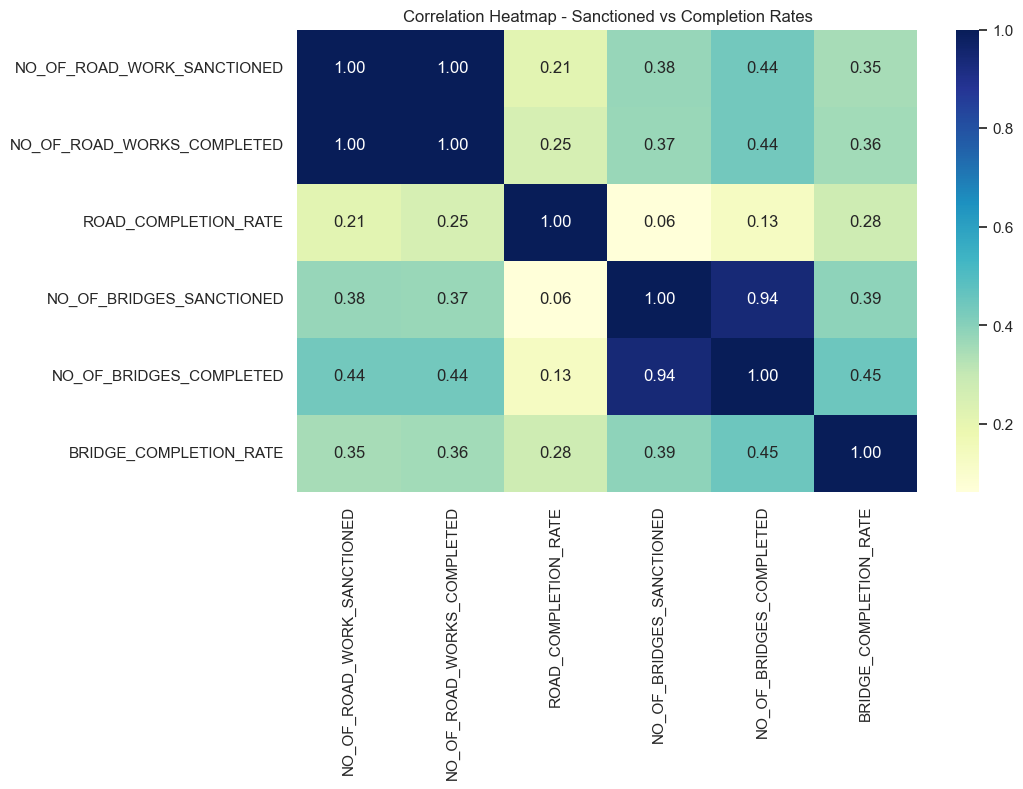

In [16]:
correlation_columns = [
    'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_ROAD_WORKS_COMPLETED', 'ROAD_COMPLETION_RATE',
    'NO_OF_BRIDGES_SANCTIONED', 'NO_OF_BRIDGES_COMPLETED', 'BRIDGE_COMPLETION_RATE'
]

corr_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap - Sanctioned vs Completion Rates')
plt.show()

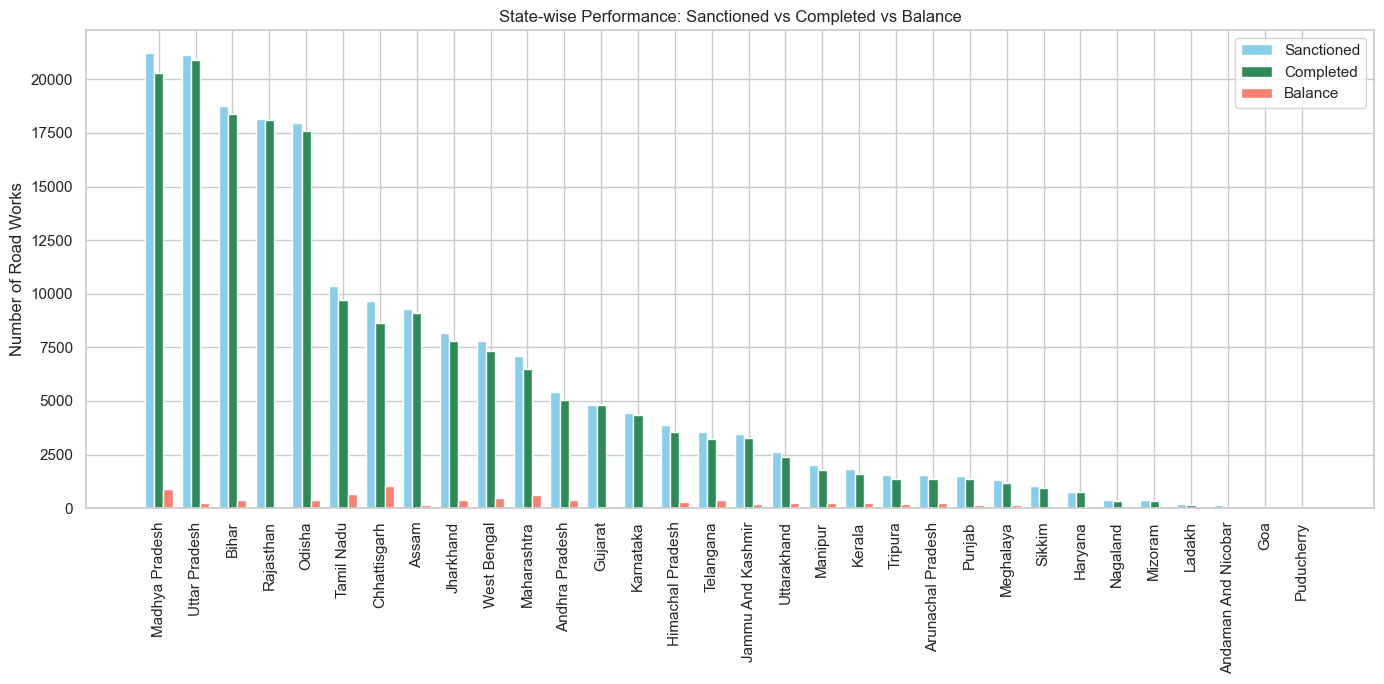

In [17]:
state_summary = df.groupby('STATE_NAME').agg({
    'NO_OF_ROAD_WORK_SANCTIONED': 'sum',
    'NO_OF_ROAD_WORKS_COMPLETED': 'sum',
    'NO_OF_ROAD_WORKS_BALANCE': 'sum'
}).reset_index()
state_summary = state_summary.sort_values(by='NO_OF_ROAD_WORK_SANCTIONED', ascending=False)
plt.figure(figsize=(14, 7))
bar_width = 0.25
x = range(len(state_summary))
plt.bar(x, state_summary['NO_OF_ROAD_WORK_SANCTIONED'], width=bar_width, label='Sanctioned', color='skyblue')
plt.bar([p + bar_width for p in x], state_summary['NO_OF_ROAD_WORKS_COMPLETED'], width=bar_width, label='Completed', color='seagreen')
plt.bar([p + bar_width*2 for p in x], state_summary['NO_OF_ROAD_WORKS_BALANCE'], width=bar_width, label='Balance', color='salmon')
plt.xticks([p + bar_width for p in x], state_summary['STATE_NAME'], rotation=90)
plt.ylabel("Number of Road Works")
plt.title("State-wise Performance: Sanctioned vs Completed vs Balance")
plt.legend()
plt.tight_layout()
plt.show()

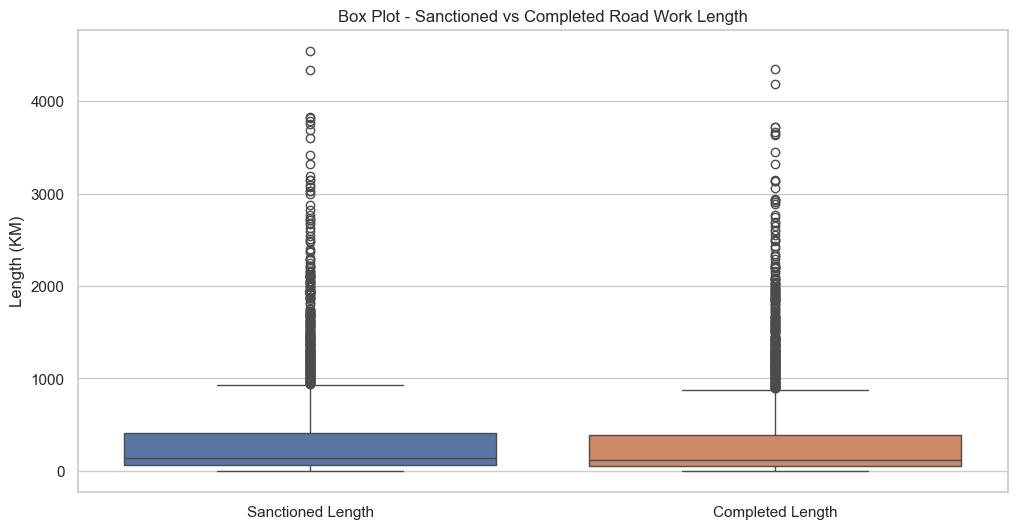

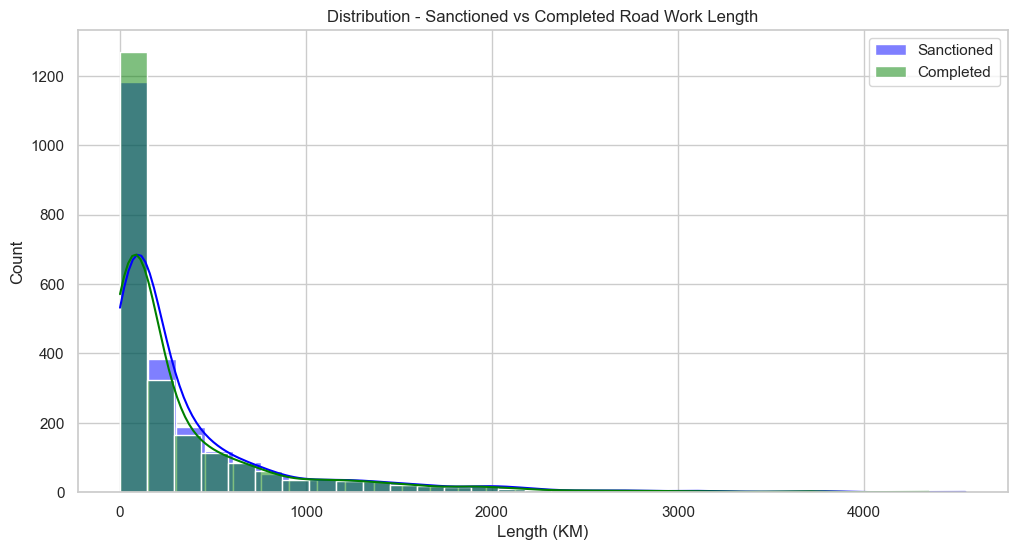

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'LENGTH_OF_ROAD_WORK_COMPLETED_KM']])
plt.title("Box Plot - Sanctioned vs Completed Road Work Length")
plt.ylabel("Length (KM)")
plt.xticks([0, 1], ['Sanctioned Length', 'Completed Length'])
plt.show()
plt.figure(figsize=(12, 6))
sns.histplot(df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'], kde=True, color='blue', label='Sanctioned', bins=30)
sns.histplot(df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'], kde=True, color='green', label='Completed', bins=30)
plt.title("Distribution - Sanctioned vs Completed Road Work Length")
plt.xlabel("Length (KM)")
plt.legend()
plt.show()


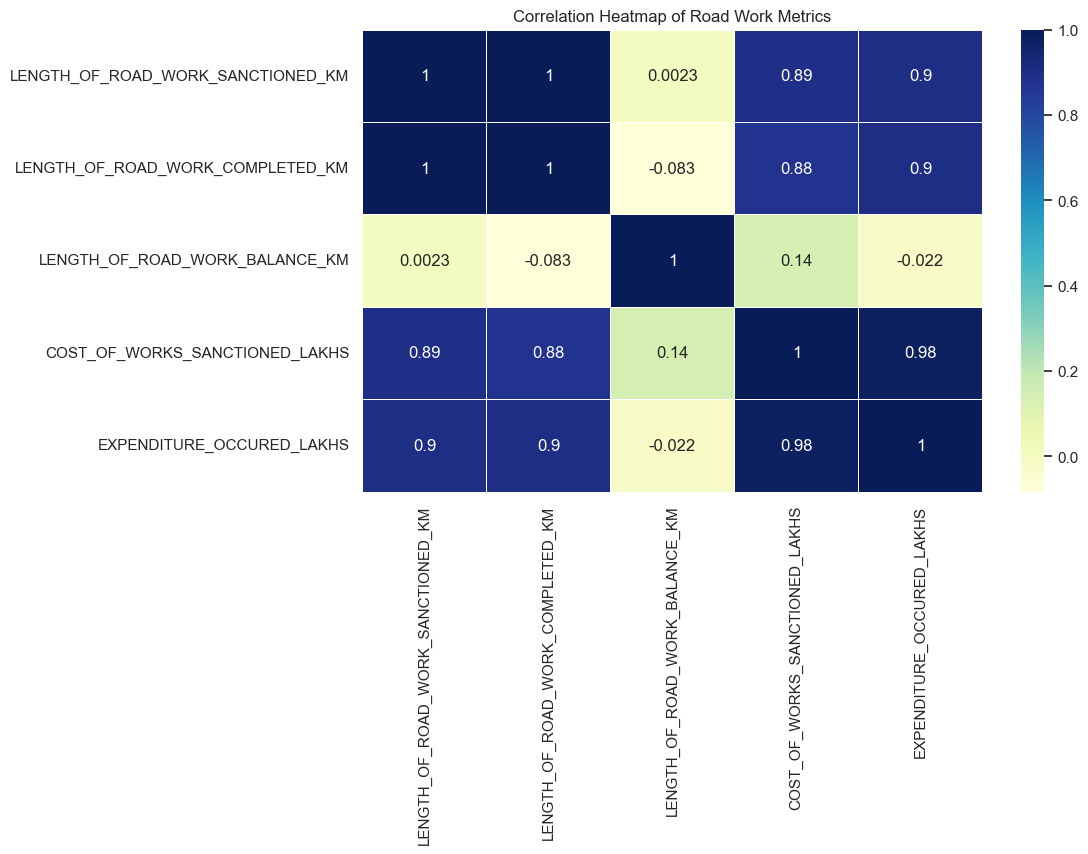

In [19]:
corr_columns = [
    'LENGTH_OF_ROAD_WORK_SANCTIONED_KM',
    'LENGTH_OF_ROAD_WORK_COMPLETED_KM',
    'LENGTH_OF_ROAD_WORK_BALANCE_KM',
    'COST_OF_WORKS_SANCTIONED_LAKHS',
    'EXPENDITURE_OCCURED_LAKHS'
]
correlation_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap of Road Work Metrics")
plt.show()
covariance_matrix = df[corr_columns].cov()